# Import required libraries

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlp import MLP, ActivationFunction

# Prepare MNIST

In [2]:
# Load and preprocess the MNIST dataset
mnist = load_digits()
X_mnist, y_mnist = mnist.data, mnist.target

# Split the data into training and test sets
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Further split the training data into new training and validation sets
X_mnist_train, X_mnist_val, y_mnist_train, y_mnist_val = train_test_split(X_mnist_train, y_mnist_train, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_mnist_train = scaler.fit_transform(X_mnist_train)
X_mnist_val = scaler.transform(X_mnist_val)
X_mnist_test = scaler.transform(X_mnist_test)

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_mnist_train = encoder.fit_transform(y_mnist_train.reshape(-1, 1))
y_mnist_val = encoder.transform(y_mnist_val.reshape(-1, 1))
y_mnist_test = encoder.transform(y_mnist_test.reshape(-1, 1))

/Users/robertnasuti/.local/share/virtualenvs/MultiLayerPerceptron-cyc80dTD/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Train custom neural network on MNIST

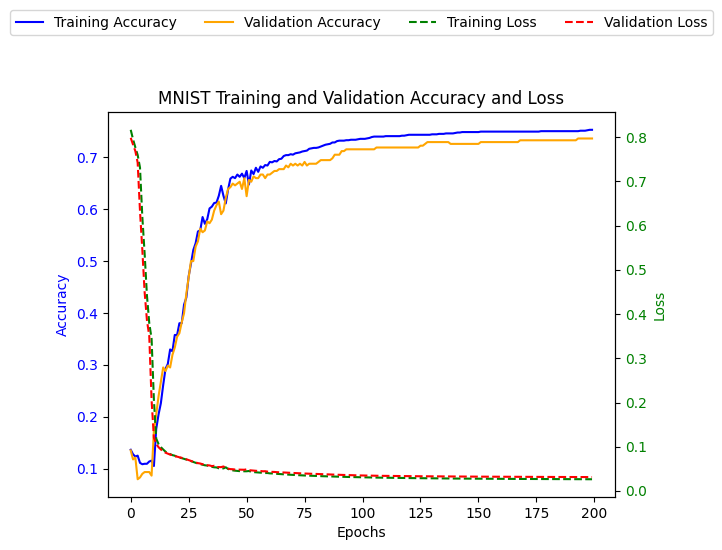

In [3]:
# Initialize and train the MLP on MNIST
mlp_mnist = MLP(input_size=64, hidden_size=32, output_size=10, learning_rate=0.01, activation_function=ActivationFunction.SIGMOID)
mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses = mlp_mnist.train(X_mnist_train, y_mnist_train, X_mnist_val, y_mnist_val, epochs=200)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot training and validation accuracy
ax1.plot(mnist_training_accuracies, label='Training Accuracy', color='blue')
ax1.plot(mnist_validation_accuracies, label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.plot(mnist_training_losses, label='Training Loss', linestyle='--', color='green')
ax2.plot(mnist_validation_losses, label='Validation Loss', linestyle='--', color='red')
ax2.set_ylabel('Loss', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and a legend
plt.title('MNIST Training and Validation Accuracy and Loss')
fig.tight_layout()  # Adjust the layout
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.show()

# Evaluate custom neural network on MNIST

In [4]:
# Evaluate the MLP on MNIST
mnist_predictions = mlp_mnist.predict(X_mnist_test)
mnist_accuracy = accuracy_score(np.argmax(y_mnist_test, axis=1), np.argmax(mnist_predictions, axis=1))
print(f"Accuracy on MNIST: {mnist_accuracy}")

Accuracy on MNIST: 0.7666666666666667


# Prepare Iris data

In [5]:
# Load and preprocess the Iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Split the original data into training and test sets
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Further split the training data into new training and validation sets
X_iris_train, X_iris_val, y_iris_train, y_iris_val = train_test_split(X_iris_train, y_iris_train, test_size=0.2, random_state=42)

# Normalize the Iris data
scaler = StandardScaler()
X_iris_train = scaler.fit_transform(X_iris_train)
X_iris_val = scaler.transform(X_iris_val)  # Normalize validation data
X_iris_test = scaler.transform(X_iris_test)

# One-hot encode the Iris labels
encoder = OneHotEncoder(sparse=False)
y_iris_train = encoder.fit_transform(y_iris_train.reshape(-1, 1))
y_iris_val = encoder.transform(y_iris_val.reshape(-1, 1))  # One-hot encode validation labels
y_iris_test = encoder.transform(y_iris_test.reshape(-1, 1))

/Users/robertnasuti/.local/share/virtualenvs/MultiLayerPerceptron-cyc80dTD/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Train custom neural network on Iris

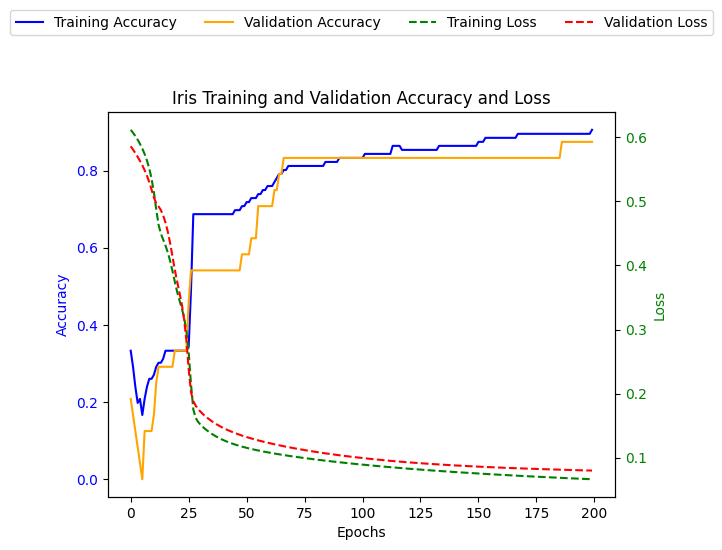

In [6]:
# Initialize and train the MLP on the Iris dataset
mlp_iris = MLP(input_size=4, hidden_size=10, output_size=3, learning_rate=0.01, activation_function=ActivationFunction.SIGMOID)
iris_training_accuracies, iris_validation_accuracies, iris_training_losses, iris_validation_losses = mlp_iris.train(X_iris_train, y_iris_train, X_iris_val, y_iris_val, epochs=200)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot training and validation accuracy
ax1.plot(iris_training_accuracies, label='Training Accuracy', color='blue')
ax1.plot(iris_validation_accuracies, label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.plot(iris_training_losses, label='Training Loss', linestyle='--', color='green')
ax2.plot(iris_validation_losses, label='Validation Loss', linestyle='--', color='red')
ax2.set_ylabel('Loss', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and a legend
plt.title('Iris Training and Validation Accuracy and Loss')
fig.tight_layout()  # Adjust the layout
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.show()

# Evaluate custom neural network on Iris

In [7]:
# Evaluate the MLP on Iris
iris_predictions = mlp_iris.predict(X_iris_test)
iris_accuracy = accuracy_score(np.argmax(y_iris_test, axis=1), np.argmax(iris_predictions, axis=1))
print(f"Accuracy on Iris: {iris_accuracy}")

Accuracy on Iris: 0.9333333333333333
